I intend to use this section to become familiar with matplotlib, and producing plots with it.



In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
c = np.array([0, -0.1+0.8j, -0.75, .367+0.1j])
             
print(c.imag)
print(c.real)

[ 0.   0.8  0.   0.1]
[ 0.    -0.1   -0.75   0.367]


In [4]:

def iterateQuad(z0, constant , N, display=False, maxModulus = 100):
    z = np.zeros(N+1, dtype=complex)
    z[0] = z0
    for i in range(1,N+1):
        w = z[i-1]
        
        modZ = np.absolute(w)
        if(modZ > maxModulus):
            if(display):
                print("Things are getting out of control, compadre!")
                print("z is {:f}").format(w)
            raise ValueError("Unbounded orbit, terminating iteration")
        
        z[i] = w.real*w.real - w.imag*w.imag + (2*w.real*w.imag)*(0+1j) + constant
        if(display):
            print("{:f}".format(z[i]))
            
        
        
        
    return z
iterateQuad(0+1j,0,10)


array([ 0.+1.j, -1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j])

In [5]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

So now that I can generate arrays quickly, let's put it use to generate some plots.

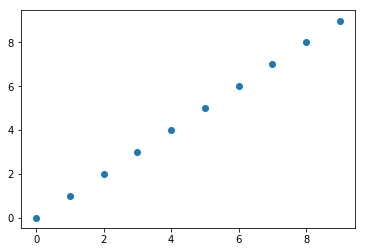

In [6]:
plt.scatter(x=np.arange(10),y=np.arange(10))
plt.show()

Moving on. Let's see if I can generate some fractals.

In [7]:
c_1 = -0.4+0.6j
output = iterateQuad(-1,0.8j,150)
#print(output)
plt.scatter(output.real, output.imag)
plt.plot(output.real, output.imag)
#plt.autoscale(tight=True)

plt.show()


ValueError: Unbounded orbit, terminating iteration

So clearly, this is not what I'm looking for. The problem is likely the seed value for the orbit. That is to say, the critical points might not be attracting, and hence an arbitrary inital value might not drift toward the desired orbit over successive iterations. 

Let's try a few different seeds.


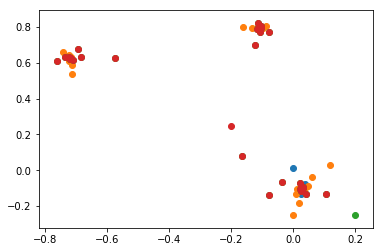

In [38]:
def makeIteratedPlot(c, seed, iterations, tightFit = False, trace = True, display = False, maxModulus = 100):
    output = iterateQuad(seed, c, iterations, display, maxModulus=maxModulus)
    plt.scatter(output.real, output.imag)
    if(trace):
        plt.plot(output.real, output.imag)
    plt.autoscale(tight=tightFit)

    
makeIteratedPlot(c[1], 0+0.01j, 100, trace=False)
makeIteratedPlot(c[1], 0-0.25j, 100, trace=False)
makeIteratedPlot(c[1], 0.2-0.25j, 100, trace=False)
makeIteratedPlot(c[1], -0.2+0.25j, 100, trace=False)
plt.show()

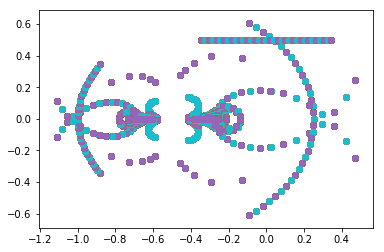

In [42]:
for x in np.linspace(-0.75,0.75,75):
    for y in np.linspace(0.5,0.5,75):
        seed = x + (y)*(1j)
        try:
            makeIteratedPlot(c[2],seed,50,trace=False) 
        except ValueError:
            pass
plt.axis()
plt.show()

NOW we're talking. Alright, we're starting to get some interesting personalities being shown in our plots. 

The Julia set is NOT the orbit produced by a given seed value. The Julia set, for a given function, is the set of all seed values that will produce a BOUNDED orbit. I'm going to write a new function to accomplish the task of plotting the Julia Set

In [24]:
square = lambda x: x*x
square(-0.5j + 0.5j)

0j

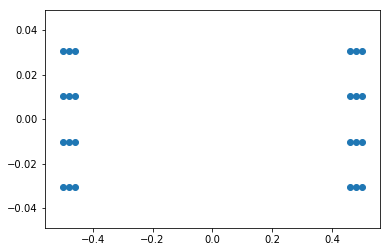

In [56]:
def juliaSet(f, xmin=-0.5, xmax=0.5, ymin=-0.5, ymax=0.5, latticeSide=50, maxModulus=1, maxIteration=25, display=True):
    u = np.linspace(xmin, xmax, latticeSide)
    v = np.linspace(ymin, ymax, latticeSide)
    (uu, vv) = np.meshgrid(u, v, sparse=True)
    grid = np.concatenate(uu + (1j)*vv)
    epsilon = 1e-1
    seeds = []
    if display:
        print("u: {0}".format(u))
        print("v: {0}".format(v))
        print("uu: {0}".format(uu))
        print("vv: {0}".format(vv))
        print("grid: {0}".format(grid))
    for z0 in grid:
            z = f(z0)
            k = 1
            if display:
                print("Re z:{0}, Im z:{1}".format(np.real(z0), np.imag(z0)))
                print("z0:{0}".format(z0))
            while k < maxIteration and np.abs(z) < maxModulus:
                if display:
                    print("Re z:{0}, Im z:{1}".format(np.real(z), np.imag(z)))
                if np.abs(z-f(z)) < epsilon: 
                    seeds.append(z0)
                    break
                else:
                    z = f(z)
                k = k + 1
    return seeds
unitParabola = juliaSet(lambda x: x*x - 0.75, display=False)
#print(unitParabola)
plt.scatter(np.real(unitParabola), np.imag(unitParabola))
plt.show()